In [8]:
import os
import numpy as np
from skimage import transform, io
import matplotlib.pyplot as plt
from shutil import copyfile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
DATASET_DIR = "./dataset/sdd"

IMG_SIZE = (32, 32)

BATCH_SIZE = 4

In [10]:
# build train batches
datagen = ImageDataGenerator()
train_ds = datagen.flow_from_directory(DATASET_DIR + '/train',
                                       interpolation='bicubic',
                                       class_mode='categorical',
                                       target_size=IMG_SIZE,
                                       shuffle=True,
                                       batch_size=BATCH_SIZE)

#build test batches
datagen = ImageDataGenerator()
test_ds = datagen.flow_from_directory(DATASET_DIR + '/test',
                                      interpolation='bicubic',
                                      class_mode='categorical',
                                      target_size=IMG_SIZE,
                                      shuffle=False,
                                      batch_size=BATCH_SIZE)

# build class dict
class_list = [cls_label for cls_label, idx in train_ds.class_indices.items()]

print("\ntraing batches number:", len(train_ds))
print("test batches number:", len(test_ds))
print("\nclass list:\n", class_list)

Found 16229 images belonging to 120 classes.
Found 4111 images belonging to 120 classes.

traing batches number: 4058
test batches number: 1028

class list:
 ['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n0209375

train_imgs.shape:  (4, 32, 32, 3)
train_labels.shape:  (4, 120)
['n02109961-Eskimo_dog', 'n02093991-Irish_terrier', 'n02106550-Rottweiler', 'n02108551-Tibetan_mastiff']


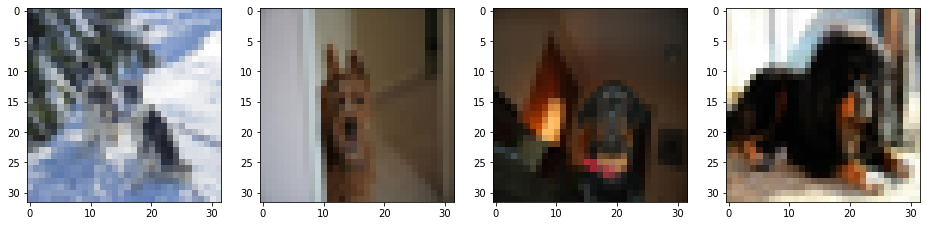

In [11]:
# show train batch
train_imgs, train_labels = train_ds[0]
print("train_imgs.shape: ", train_imgs.shape)
print("train_labels.shape: ", train_labels.shape)

plt.figure(num=BATCH_SIZE, figsize=(16, 16))
for i, img in enumerate(train_imgs):
    plt.subplot(1, BATCH_SIZE, i + 1)
    plt.imshow(img.astype('uint8'))

labels = [class_list[np.where(label == 1)[0][0]] for label in train_labels]
print(labels)

In [12]:
class MyModel(Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = Conv2D(32, 3, activation='relu')
        self.flatten = Flatten()
        self.d1 = Dense(128, activation='relu')
        self.d2 = Dense(120, activation='softmax')

    def call(self, x):
        x = self.conv1(x)
        x = self.flatten(x)
        x = self.d1(x)
        x = self.d2(x)

        return x


model = MyModel()

In [16]:
imgs, labels = train_ds[0]
model.build(imgs.shape)
print(model.summary())

Model: "my_model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            multiple                  896       
_________________________________________________________________
flatten_1 (Flatten)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  3686528   
_________________________________________________________________
dense_3 (Dense)              multiple                  15480     
Total params: 3,702,904
Trainable params: 3,702,904
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
EPOCHS = 2

loss_object = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy', metrics=['accuracy'])

model.fit_generator(train_ds,
                    steps_per_epoch = len(train_ds),
                    validation_data = test_ds,
                    validation_steps = len(test_ds),
                    epochs = EPOCHS)

Epoch 1/2
4058/4058 [==============================] - 102s 25ms/step - loss: 4.7825 - accuracy: 0.0118 - val_loss: 4.7792 - val_accuracy: 0.0122
Epoch 2/2
4058/4058 [==============================] - 103s 25ms/step - loss: 4.7812 - accuracy: 0.0118 - val_loss: 4.7789 - val_accuracy: 0.0122
